In [1]:
# import the modules that we need and specify the folder which contains the files
import pandas as pd
import glob, os
import numpy as np
import matplotlib as mpl

from pylab import imshow
from skimage import io
import skimage
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

from skimage.feature import blob_log
from math import sqrt

In [13]:
def blob_counting(file):
    image = io.imread(file)
    DNA = image[..., 2]
    green = image[..., 1]
    
    dna_blobs_log = blob_log(DNA, max_sigma=20, min_sigma = 5, num_sigma=5, overlap = 0.5, threshold=.08)
    dna_blobs_log[:, 2] = dna_blobs_log[:, 2] * sqrt(2)
    
    green_blobs_log = blob_log(green, max_sigma=20, min_sigma = 10, num_sigma=5, overlap = 0.5, threshold=.04)
    green_blobs_log[:, 2] = green_blobs_log[:, 2] * sqrt(2)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True,
                             subplot_kw={'adjustable': 'box-forced'})
    plt.tight_layout()
    
    ax1.imshow(DNA, interpolation = 'nearest')
    ax1.set_axis_off()
    ax1.set_title(file.split('.')[0] + '_DNA')
    for blob in dna_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'cyan', linewidth=1.5, fill=False)
        ax1.add_patch(c)
        
    ax2.imshow(green, interpolation = 'nearest')
    ax2.set_axis_off()
    ax2.set_title(file.split('.')[0] + '_green')
    for blob in green_blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color= 'green', linewidth=1.5, fill=False)
        ax2.add_patch(c)
    fig.savefig(file.split('.')[0] + '_analysis')
    
    return [len(dna_blobs_log), len(green_blobs_log)]

In [14]:
from multiprocessing.dummy import Pool as ThreadPool 

CPU times: user 7.24 s, sys: 409 ms, total: 7.65 s
Wall time: 5.44 s


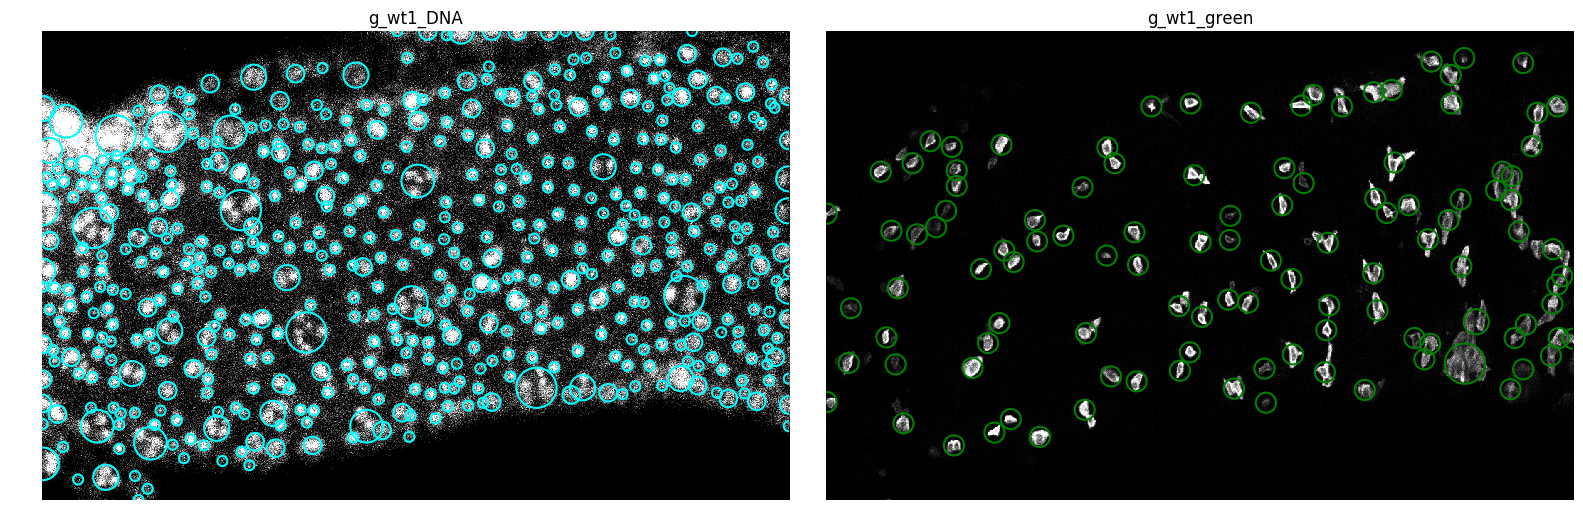

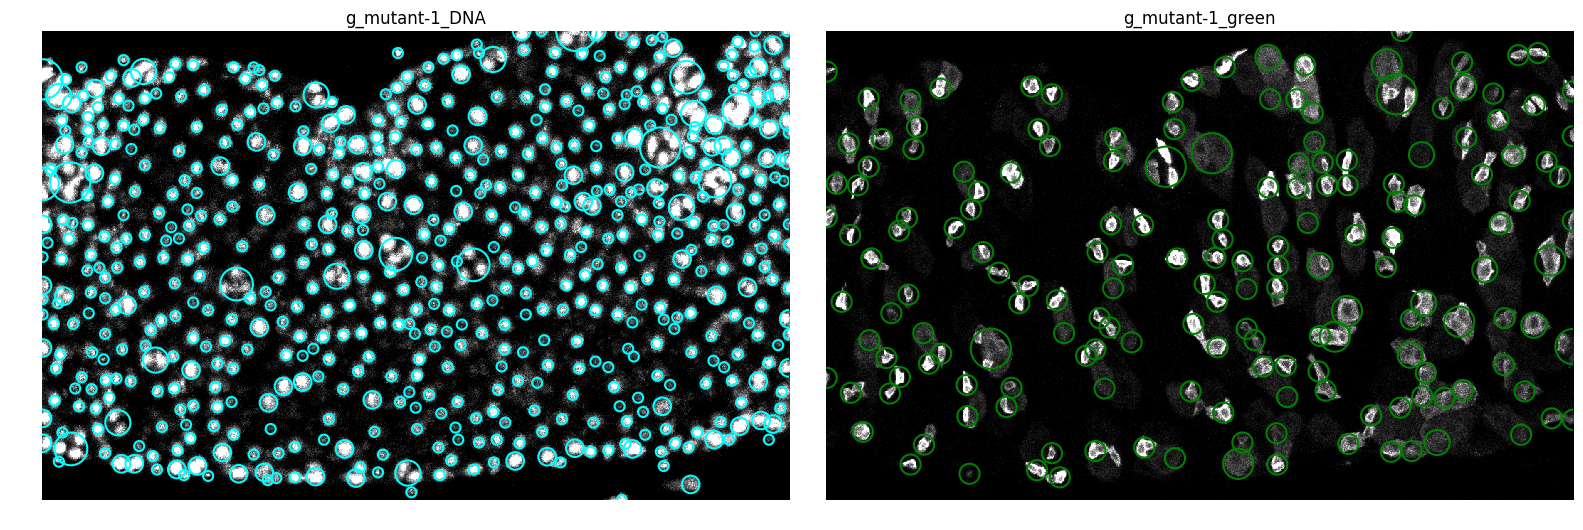

In [15]:
%%time

current_path = %pwd
file_list = os.listdir(current_path)
#
file_list = [i for i in file_list if i[:2] == 'g_' and i[-3:] == 'tif']

pool = ThreadPool(2)
results = pool.map(blob_counting, file_list)
pool.close()
pool.join

# result_dictionary = {}
# for file in file_list:
#     result_dictionary[file.split('.')[0]] = blob_counting(file)

In [5]:
image = io.imread('g_mutant-1.tif')
image.shape

(661, 1051, 3)

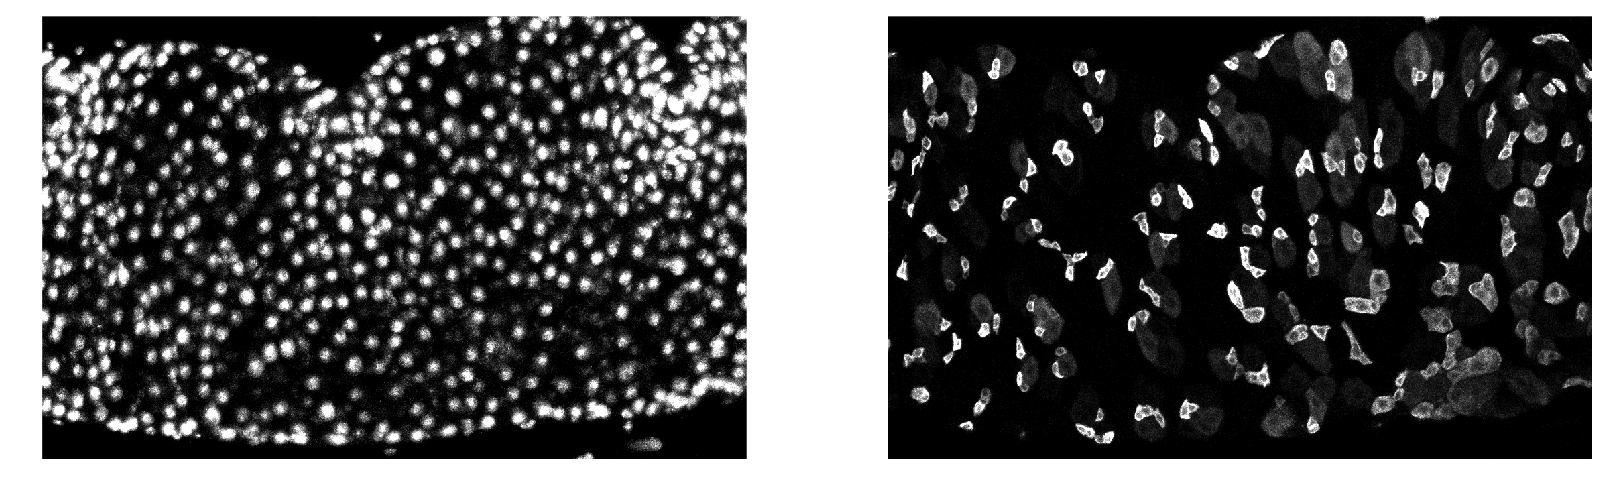

In [8]:
DNA = image[..., 2]
green = image[..., 1]

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 15))
ax1.imshow(DNA)
ax2.imshow(green)
ax1.set_axis_off()
ax2.set_axis_off()

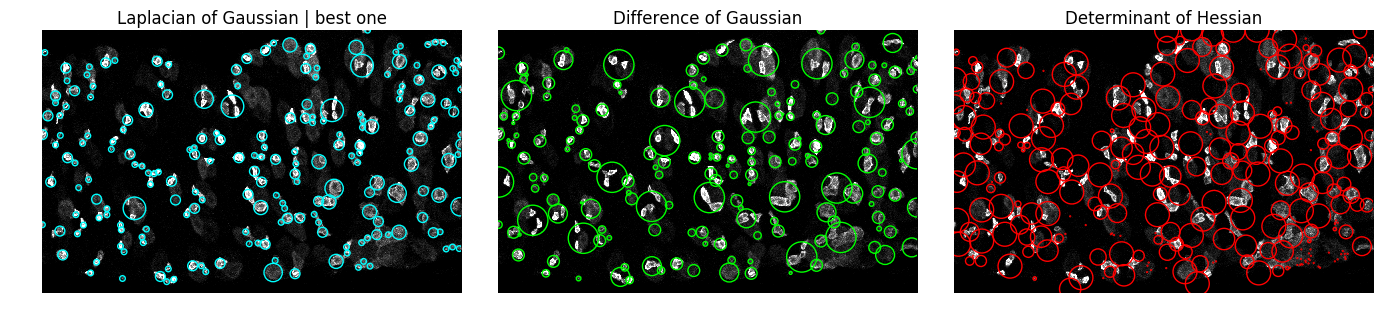

In [9]:
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray

blobs_log = blob_log(green, max_sigma=20, min_sigma = 5, num_sigma=5, overlap = 0.1, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(green, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(green, max_sigma=30, threshold=.001)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['cyan', 'lime', 'red']
titles = ['Laplacian of Gaussian | best one', 'Difference of Gaussian',
          'Determinant of Hessian']

sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
plt.tight_layout()

axes = axes.ravel()
for blobs, color, title in sequence:
    ax = axes[0]
    axes = axes[1:]
    ax.set_title(title)
    ax.imshow(green, interpolation='nearest')
    ax.set_axis_off()
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=1, fill=False)
        ax.add_patch(c)